In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [9]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [12]:
import datetime as dt
# Renaming columns for better clarity
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)



In [13]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


EDA


In [14]:
df_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [15]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

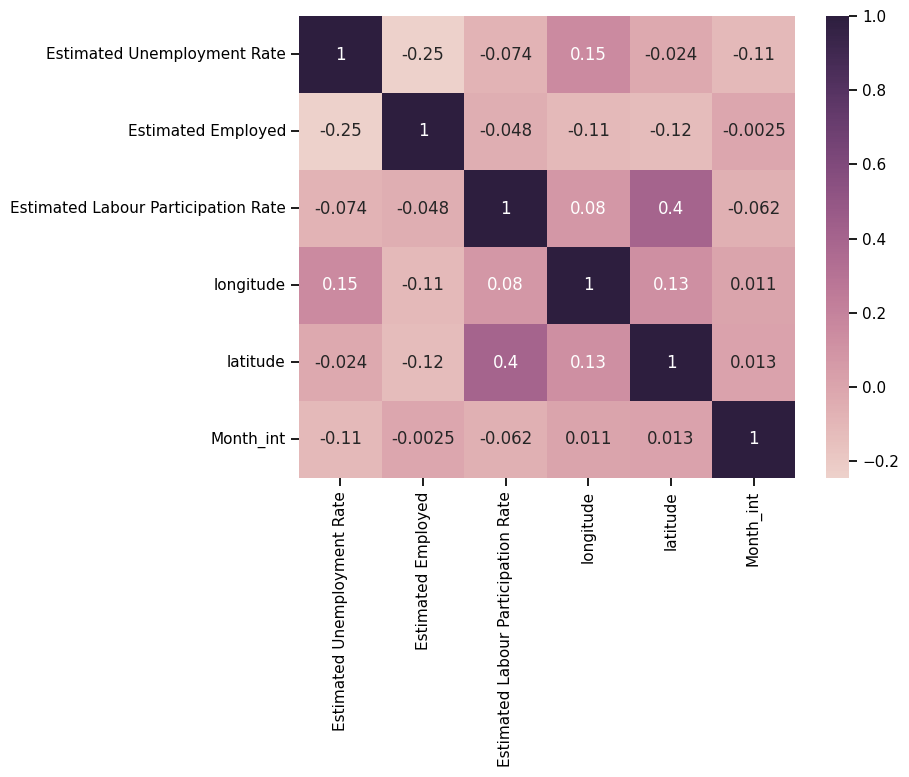

In [16]:
hm = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(8,6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:

import plotly.express as px
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


fig = px.scatter_matrix(df,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed','Estimated Labour Participation Rate'],color='Region')
fig.show()


plot_unemp = df[['Estimated Unemployment Rate','States']]
df_unemployed = plot_unemp.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()


fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()


# Creating a DataFrame with relevant columns
unemployed_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

unemployed = unemployed_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

# Creating a Sunburst chart
fig = px.sunburst(unemployed, path=['Region', 'States'], values='Estimated Unemployment Rate', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.show()

Impact of Lockdown on Estimated Employed states


In [23]:
# Filtering data for the period before the lockdown (January to April)
bf_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

# Filtering data for the lockdown period (April to July)
lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

# Calculating the mean unemployment rate before lockdown by state
j_bf_lock = bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
j_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
j_lock['Unemployment Rate before lockdown'] = j_bf_lock['Estimated Unemployment Rate']

j_lock.columns = ['States','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
j_lock.head()


,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [ ]:
# percentage change in unemployment rate

j_lock['Percentage change in Unemployment'] = round(j_lock['Unemployment Rate after lockdown'] - j_lock['Unemployment Rate before lockdown']/j_lock['Unemployment Rate before lockdown'],2)
plot_per = j_lock.sort_values('Percentage change in Unemployment')


# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='Percentage change in Unemployment',color='Percentage change in Unemployment',
            title='Percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

The Most impacted States/UT :
Tripura

Haryana

Bihar

Puducherry

Jharkhand

In [25]:
def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [26]:
plot_per['impact status'] = plot_per['Percentage change in Unemployment'].apply(lambda x:sort_impact(x))

In [ ]:
fig = px.bar(plot_per, y='States',x='Percentage change in Unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()